In [3]:
import pandas as pd
df = pd.read_csv("/content/commentss.csv")
df.head()

,Unnamed: 0,Comment,Likes,Time,user
0,0,This is perhaps the golden period of Indian po...,4.7K,3 months ago,NaN
1,1,Huge respect from Russia. This man is a true g...,1.1K,3 months ago,NaN
2,2,"This man is gold, India has landed on its feet...",64,1 month ago,NaN
3,3,After listening to him for exactly one hour an...,540,2 months ago,NaN
4,4,i am fan of his intelligence from Bangladesh🇧🇩...,300,2 months ago,NaN


In [20]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
#removing stopwords
df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Comment'][:5].values

array(['This perhaps golden period Indian politics intelligent, competent sincere leaders helm country',
       'Huge respect Russia. This man true gem perfect example politician future.',
       'This man gold, India landed feet someone caliber. Brilliant, articulate honest straightforward. Wish country someone based.',
       'After listening exactly one hour forty minutes, I find feeling optimistic country current government passing moment.',
       'fan intelligence Bangladesh🇧🇩.This man gem diplomacy.'],
      dtype=object)

In [23]:
df.shape

(275, 5)

In [6]:
!pip install bertopic[visualization] --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 54.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 79.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.2 MB/s eta 0:00:00


In [7]:
import numpy as np
from copy import deepcopy
from bertopic import BERTopic

In [24]:
#keeping all the comments into a list
docs = list(df.iloc[:,1].values)
docs[:5]

['This perhaps golden period Indian politics intelligent, competent sincere leaders helm country',
 'Huge respect Russia. This man true gem perfect example politician future.',
 'This man gold, India landed feet someone caliber. Brilliant, articulate honest straightforward. Wish country someone based.',
 'After listening exactly one hour forty minutes, I find feeling optimistic country current government passing moment.',
 'fan intelligence Bangladesh🇧🇩.This man gem diplomacy.']

In [25]:
#creating instancew of the model
model = BERTopic(language="english")

In [26]:
#fitting comments into the model
topics,probs = model.fit_transform(docs)

In [27]:
model.get_topic_freq()

,Topic,Count
5,0,63
1,1,43
0,2,38
6,3,38
4,4,35
2,5,26
3,6,15
7,7,12
8,-1,5


In [39]:
#getting individual topics
model.get_topic(0)

[('podcast', 0.07183049860734483),
 ('eam', 0.06523878415645172),
 ('blessed', 0.03785071426991927),
 ('making', 0.03557382529713106),
 ('dr', 0.03490587715537756),
 ('proud', 0.032932667472617895),
 ('best', 0.032650223727598654),
 ('really', 0.031346458345627194),
 ('listen', 0.030295481277985873),
 ('back', 0.029726379402795988)]

In [31]:
model.visualize_topics()

In [48]:
words = []
top_words = ''
for word in model.get_topic(0):
  words.append(word[0])
top_words = " ".join([word for word in words])
top_words

'podcast eam blessed making dr proud best really listen back'

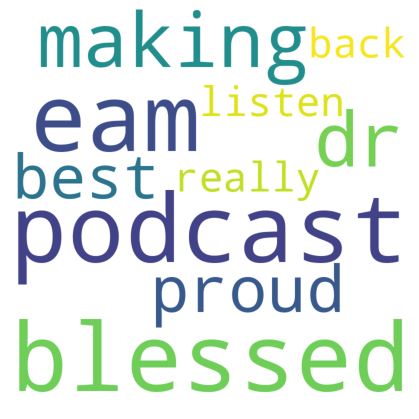

In [52]:
#word cloud for top topic
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(str(top_words))
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()